<a href="https://colab.research.google.com/github/tomarforever86/CNN/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]
# Converted y_train and y_test to a 1-D array

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

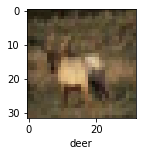

In [11]:
plot_sample(X_train, y_train, 3)

In [12]:
# Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
# Building simple ANN model

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.8138 - accuracy: 0.3546
Epoch 2/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.6244 - accuracy: 0.4251
Epoch 3/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.5409 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4813 - accuracy: 0.4766
Epoch 5/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4339 - accuracy: 0.4934


In [15]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.50      0.54      1000
           1       0.68      0.55      0.61      1000
           2       0.41      0.32      0.36      1000
           3       0.41      0.21      0.28      1000
           4       0.50      0.32      0.39      1000
           5       0.43      0.33      0.38      1000
           6       0.35      0.81      0.49      1000
           7       0.56      0.56      0.56      1000
           8       0.54      0.72      0.62      1000
           9       0.56      0.56      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [16]:
#Now building CNN Model


cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4422 - accuracy: 0.4821
Epoch 2/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.0909 - accuracy: 0.6180
Epoch 3/5
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9599 - accuracy: 0.6664
Epoch 4/5
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8654 - accuracy: 0.7012
Epoch 5/5
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7919 - accuracy: 0.7260


In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9336 - accuracy: 0.6733


[0.9336495995521545, 0.67330002784729]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.90266455e-03, 4.28408275e-05, 3.97371966e-03, 5.83398104e-01,
        1.09975655e-02, 3.82799357e-01, 1.08406069e-02, 5.37829066e-04,
        3.56206368e-03, 1.94523064e-03],
       [2.10140496e-02, 4.48795050e-01, 2.13213600e-04, 1.67773804e-04,
        2.99464568e-06, 1.14295963e-05, 1.21617484e-06, 2.21454957e-06,
        4.06643093e-01, 1.23148985e-01],
       [5.74711896e-02, 1.58767551e-01, 2.64151138e-03, 1.81059018e-02,
        6.30879635e-03, 2.15670792e-03, 3.66308144e-03, 1.13640388e-03,
        5.87138355e-01, 1.62610471e-01],
       [7.70680189e-01, 1.25719402e-02, 2.13930514e-02, 2.92866095e-03,
        2.65670344e-02, 1.80381212e-05, 9.90101602e-04, 6.88167493e-05,
        1.64576173e-01, 2.05953984e-04],
       [5.34577839e-06, 2.12257946e-05, 4.31631543e-02, 7.18439445e-02,
        8.27347279e-01, 1.39481835e-02, 4.33499776e-02, 1.32166344e-04,
        1.26105093e-04, 6.25564135e-05]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

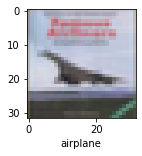

In [23]:
plot_sample(X_test, y_test,3)

In [24]:
classes[y_classes[3]]

'airplane'